In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error

def evaluation_metrics(y_pred, y_label, thresh=0.5):
    true_pos = []
    true_neg = []
    false_pos = []
    false_neg = []

    for i in range(len(y_pred)):
        if y_label[i] < thresh and y_pred[i] < thresh:
            true_neg.append(i)
        elif y_label[i] > thresh and y_pred[i] > thresh:
            true_pos.append(i)
        elif y_label[i] < thresh and y_pred[i] > thresh:
            false_pos.append(i)
        elif y_label[i] > thresh and y_pred[i] < thresh:
            false_neg.append(i)

    TP = len(true_pos)
    TN = len(true_neg)
    FP = len(false_pos)
    FN = len(false_neg)

    fpr, tpr, thresholds = roc_curve(y_label, y_pred, pos_label=1)

    eval = \
    {
        'accuracy'  : (TP + TN) / (TP + TN + TN + FN) if (TP + TN + TN + FN) > 0 else 0, 
        'precision' : TP / (TP + FP) if (TP + FP) > 0 else 0,
        'recall'    : TP / (TP + FN) if (TP + FN) > 0 else 0,
        'f1'        : (2*TP) / (2*TP + FP + FN) if (TP + FP + FN) > 0 else 0,
        'roc_auc'   : auc(fpr, tpr),
        'fpr'       : fpr,
        'tpr'       : tpr
    }

    return eval

In [2]:
# *** LOAD DATA *** 
from sklearn.model_selection import train_test_split

nominal_sample = pd.read_csv('2015_sample.csv')
failure_sample = pd.read_csv('2015_failures.csv')

# For further testing on data from the future
#future_nominal = pd.read_csv('2018_q1_sample.csv')
#future_failure = pd.read_csv('2018_q1_failures.csv')

# nominal_sample = nominal_sample.dropna(axis=0, thresh=20).dropna(axis=1)
# failure_sample = failure_sample.dropna(axis=0, thresh=20).dropna(axis=1)

feature_columns = [ 'smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized', 'smart_5_normalized',
           'smart_7_normalized','smart_12_normalized', 'smart_194_normalized', 
           'smart_197_normalized', 'smart_198_normalized', 'smart_199_normalized']

data_curr = pd.concat([nominal_sample, failure_sample])
y_curr = data_curr['failure']
x_curr = data_curr[feature_columns]

x_train, x_val, y_train, y_val = train_test_split(x_curr, y_curr, train_size=0.8, random_state=1)

#data_future = pd.concat([future_nominal, future_failure])
#y_future = data_future['failure']
#x_future = data_future[feature_columns]

x_train = x_train.values
x_val = x_val.values
y_train = y_train.values
y_val = y_val.values
#x_future = x_future.values
#y_future = y_future.values

# *** LOAD DATA ***

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
# *** MODELS ***
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

lr1 = LogisticRegression(solver='newton-cg')
lr2 = LogisticRegression(solver='lbfgs')
lr3 = LogisticRegression(solver='saga')
lr4 = LogisticRegression(solver='sag')
lr5 = LogisticRegression(solver='liblinear')

svm_linear = svm.SVC(kernel='linear', gamma='scale', probability=True)
svm_rbf = svm.SVC(kernel='rbf', gamma='scale', probability=True)
svm_poly = svm.SVC(kernel='poly', gamma='scale', probability=True)
svm_sig = svm.SVC(kernel='sigmoid', gamma='scale', probability=True)

rfc = RandomForestClassifier()
rfc100 = RandomForestClassifier(n_estimators=100)

boost1 = GradientBoostingClassifier(loss='deviance')
boost2 = GradientBoostingClassifier(loss='exponential')

gnb = GaussianNB()
ada = AdaBoostClassifier(gnb, algorithm="SAMME", n_estimators=200,learning_rate=.1)



models = [lr1, lr2, lr3, lr4, lr5, svm_linear, svm_rbf, svm_poly, svm_sig, rfc, rfc100, boost1, boost2, gnb, ada]
# *** MODELS ***

In [5]:
model_results = {}
models = [lr1, svm_poly, rfc, boost2, gnb, ada]

C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\An

Trained:   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
Metrics for training, validation
Precision: 0.6138421733505821 0.625
Recall:    0.8280977312390925 0.8185053380782918
Accuracy:  0.6687612208258528 0.6524701873935264
F1-Score:  0.7050520059435365 0.7087827426810478
AuC:       0.7106102988311143 0.7085335877022417



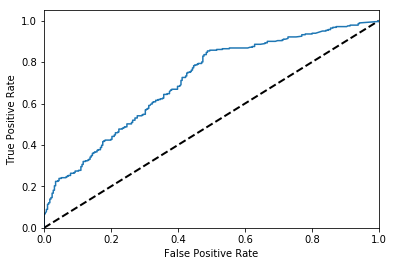

Trained:   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Metrics for training, validation
Precision: 0.6138421733505821 0.625
Recall:    0.8280977312390925 0.8185053380782918
Accuracy:  0.6687612208258528 0.6524701873935264
F1-Score:  0.7050520059435365 0.7087827426810478
AuC:       0.7105021822676567 0.7084724413300558



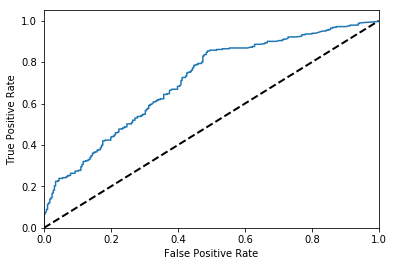

C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Trained:   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)
Metrics for training, validation
Precision: 0.6143410852713178 0.625
Recall:    0.8298429319371727 0.8185053380782918
Accuracy:  0.6696588868940754 0.6524701873935264
F1-Score:  0.7060133630289532 0.7087827426810478
AuC:       0.709285295840656 0.7061366499125605



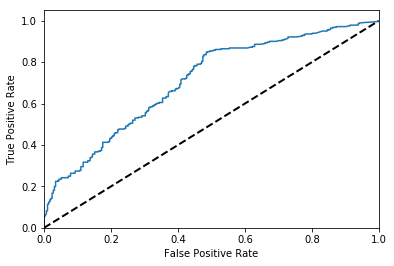

C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Trained:   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)
Metrics for training, validation
Precision: 0.6138421733505821 0.625
Recall:    0.8280977312390925 0.8185053380782918
Accuracy:  0.6687612208258528 0.6524701873935264
F1-Score:  0.7050520059435365 0.7087827426810478
AuC:       0.7102744473786717 0.7078854361570728



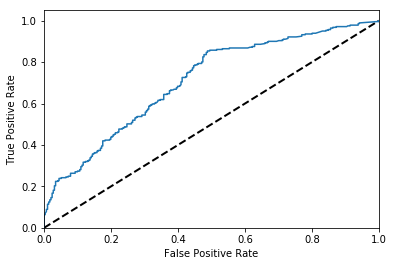

Trained:   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Metrics for training, validation
Precision: 0.6138421733505821 0.625
Recall:    0.8280977312390925 0.8185053380782918
Accuracy:  0.6687612208258528 0.6524701873935264
F1-Score:  0.7050520059435365 0.7087827426810478
AuC:       0.7105052494042088 0.7084968998789302



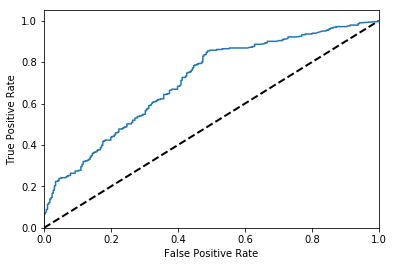

In [ ]:
# *** RUN MODELS ***

for model in models:

    model.fit(x_train, y_train)

    pred_train = model.predict_proba(x_train)[:,1]
    pred_val = model.predict_proba(x_val)[:,1]
    
    # pred_future = svm_linear.predict_proba(x_future)[:,1]
    # pred_train
    
    eval_v = evaluation_metrics(pred_val, y_val)
    eval_t = evaluation_metrics(pred_train, y_train)
    print("Trained:  ", model)
    print("Metrics for training, validation")
    print("Precision:", eval_t['precision'], eval_v['precision'])
    print("Recall:   ", eval_t['recall'], eval_v['recall'])
    print("Accuracy: ", eval_t['accuracy'], eval_v['accuracy'])
    print("F1-Score: ", eval_t['f1'], eval_v['f1'])
    print("AuC:      ", eval_t['roc_auc'], eval_v['roc_auc'])
    print("")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.plot(eval_v['fpr'], eval_v['tpr'], label='ROC curve (area = %0.2f)' % eval_v['roc_auc'])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# *** RUN MODELS ***

In [21]:
models = [svm_poly]

In [6]:
# *** RUN MODELS ***

for model in models:

    model.fit(x_train, y_train)

    pred_train = model.predict_proba(x_train)[:,1]
    pred_val = model.predict_proba(x_val)[:,1]
    
    eval_v = evaluation_metrics(pred_val, y_val)
    eval_t = evaluation_metrics(pred_train, y_train)
    model_results[model] = {}
    model_results[model]['train'] = eval_t
    model_results[model]['val'] = eval_v
    
# *** RUN MODELS ***

C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\An

In [7]:
print(model_results)

{LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False): {'val': {'recall': 0.8185053380782918, 'roc_auc': 0.7061244206381235, 'f1': 0.7087827426810478, 'accuracy': 0.6524701873935264, 'tpr': array([0.        , 0.00355872, 0.05338078, 0.0569395 , 0.06049822,
       0.06761566, 0.08185053, 0.08185053, 0.113879  , 0.113879  ,
       0.12455516, 0.12455516, 0.13523132, 0.13523132, 0.14234875,
       0.14234875, 0.16725979, 0.16725979, 0.18149466, 0.18149466,
       0.19928826, 0.19928826, 0.22419929, 0.22419929, 0.22775801,
       0.22775801, 0.23487544, 0.23487544, 0.24199288, 0.24199288,
       0.24911032, 0.24911032, 0.2633452 , 0.2633452 , 0.27402135,
       0.27402135, 0.27758007, 0.27758007, 0.29537367, 0.29537367,
       0.31672598, 0.31672598, 0.32384342, 0.32384342, 0.341637

In [8]:
models_plot = [lr1, svm_poly, rfc, boost2, gnb, ada]

In [37]:
print(models_plot)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), GradientBoostingClassifier(criterion='friedman_mse', init=None,
             

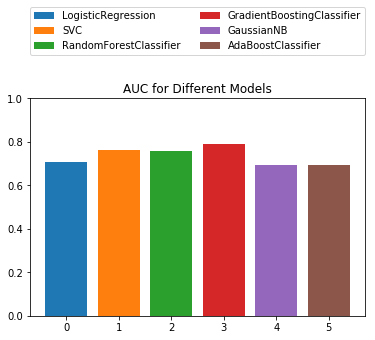

In [11]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['roc_auc'])
    plt.bar(i, model_results[model]['val']['roc_auc'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,1])
plt.title("AUC for Different Models")
plt.show()

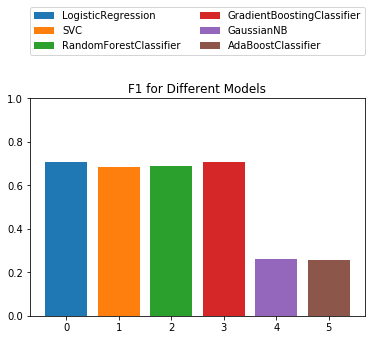

In [10]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['f1'])
    plt.bar(i, model_results[model]['val']['f1'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,1])
plt.title("F1 for Different Models")
plt.show()

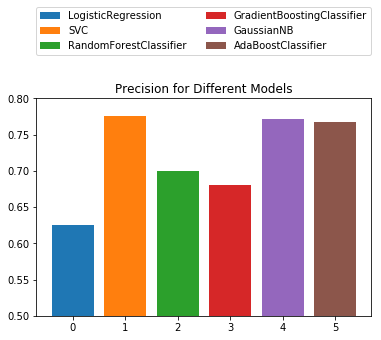

In [40]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['precision'])
    plt.bar(i, model_results[model]['val']['precision'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([.5,.8])
plt.title("Precision for Different Models")
plt.show()

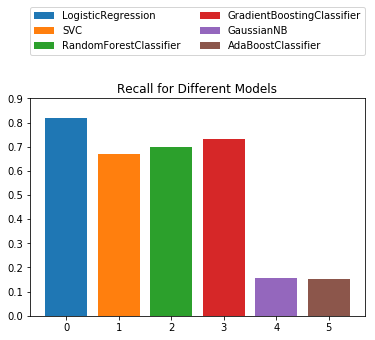

In [41]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['recall'])
    plt.bar(i, model_results[model]['val']['recall'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim([0,.9])
plt.title("Recall for Different Models")
plt.show()

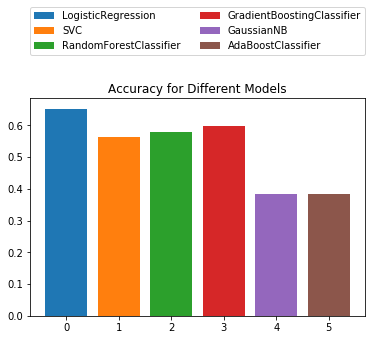

In [42]:
leg = []
data = []
for (i,model) in enumerate(models_plot):
    leg.append(str(model).split('(')[0])
    data.append(model_results[model]['val']['accuracy'])
    plt.bar(i, model_results[model]['val']['accuracy'])
plt.legend(leg,bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title("Accuracy for Different Models")
plt.show()

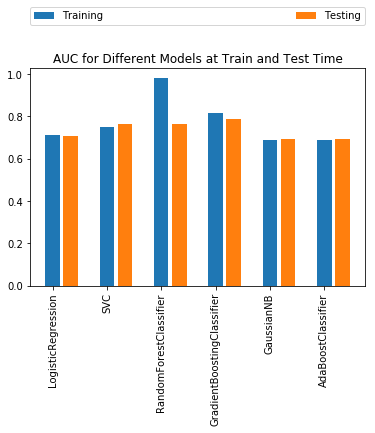

In [49]:
data_t = []
data_v = []
for (i,model) in enumerate(models_plot):
    data_t.append(model_results[model]['train']['roc_auc'])
    data_v.append(model_results[model]['val']['roc_auc'])
plt.bar([3*i for i in range(len(models_plot))], data_t)
plt.bar([3*i+1 for i in range(len(models_plot))], data_v)
plt.xticks(np.arange(0,3*len(models_plot),3), [str(m).split('(')[0] for m in models_plot],
          rotation='vertical')
plt.legend(["Training","Testing"],bbox_to_anchor=(0., 1.2, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title("AUC for Different Models at Train and Test Time")
plt.show()

In [52]:
# *** RUN MODELS ***

for model in models_plot:
    pred_train = model.predict_proba(x_train)[:,1]
    pred_val = model.predict_proba(x_val)[:,1]
    
    print(model)
    print(mean_squared_error(y_train,pred_train))
    print(mean_squared_error(y_val,pred_val))
    
# *** RUN MODELS ***

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
0.21473806184152067
0.2100048794091393
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.2136168868778954
0.2155901773447295
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.05

In [8]:
# *** SPECIAL MODEL: xgboost ***
from xgboost import XGBClassifier

xgb = XGBClassifier(objective ='reg:linear', 
                             max_depth = 10,
                             silent = 1,
                             learning_rate = 0.05,
                             n_estimators = 1000)

eval_set = [(x_val, y_val)]

#TODO eval set should be sepearte from Test set!!!

xgb.fit(x_train, y_train, early_stopping_rounds=100,eval_metric= 'logloss', eval_set=eval_set)

pred_train = model.predict_proba(x_train)[:,1]
pred_val = model.predict_proba(x_val)[:,1]

# pred_future = svm_linear.predict_proba(x_future)[:,1]
# pred_train

eval = evaluation_metrics(pred_val, y_val)
print("Trained:  ", model)
print("Precision:", eval['precision'])
print("Recall:   ", eval['recall'])
print("Accuracy: ", eval['accuracy'])
print("F1-Score: ", eval['f1'])
print("AuC:      ", eval['roc_auc'])
print("")

# *** SPECIAL MODEL: xgboost ***

OSError: [WinError 126] The specified module could not be found

In [26]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(x_curr, y_curr, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
eval_set = lgb.Dataset(X_val, label=y_val)
param = {'objective':'binary'}
train_data = lgb.Dataset(X_train, label=y_train, params=param)

num_round = 10
bst = lgb.train(params=param, train_set=train_data, num_boost_round=10, valid_sets=[eval_set])
y_pred = bst.predict(X_test)>.5
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[1]	valid_0's binary_logloss: 0.671665
[2]	valid_0's binary_logloss: 0.654115
[3]	valid_0's binary_logloss: 0.639752
[4]	valid_0's binary_logloss: 0.628685
[5]	valid_0's binary_logloss: 0.618385
[6]	valid_0's binary_logloss: 0.609147
[7]	valid_0's binary_logloss: 0.600441
[8]	valid_0's binary_logloss: 0.594815
[9]	valid_0's binary_logloss: 0.589284
[10]	valid_0's binary_logloss: 0.585423
Classification Report: 
              precision    recall  f1-score   support

          0       0.69      0.61      0.65       296
          1       0.63      0.71      0.67       276

avg / total       0.66      0.66      0.66       572

Confusion Matrix: 
 [[180 116]
 [ 79 197]]

Accuracy 0.6590909090909091


In [38]:
nominal_sample.groupby('model').date.count()

model
HGST HDS5C4040ALE630         3
HGST HMS5C4040ALE640       207
HGST HMS5C4040BLE640        98
HGST HUH728080ALE600         2
Hitachi HDS5C3030ALA630    131
Hitachi HDS5C4040ALE630     82
Hitachi HDS722020ALA330    130
Hitachi HDS723030ALA640     38
ST2000VN000                  1
ST250LM004 HN                3
ST3000DM001                 12
ST31500341AS                 4
ST31500541AS                36
ST3160316AS                  2
ST3160318AS                  1
ST33000651AS                 6
ST4000DM000                554
ST4000DX000                  2
ST500LM012 HN                7
ST6000DX000                 34
ST9250315AS                  4
TOSHIBA DT01ACA300           1
TOSHIBA MD04ABA400V          3
WDC WD10EADS                 5
WDC WD10EADX                 1
WDC WD20EFRX                 3
WDC WD30EFRX                33
WDC WD3200AAJS               1
WDC WD40EFRX                 1
WDC WD5000LPVX              12
WDC WD60EFRX                11
WDC WD800AAJB                1
Na